In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
import plotly.figure_factory as ff
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Datasets

In [ ]:
#df_ls=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_GE_all_2021-11-4.csv')
df_as_ap=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_AE_Andhra_Pradesh_2021-11-4.csv')
#df_as_ts=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_AE_Telangana_2021-11-4.csv')
#df_conversion=pd.read_excel('/content/drive/My Drive/dataverse_files/ashoka university/Constituency/parlimentary to assembly.ods', engine='odf')

<ipython-input-2-cfba189f6e74>:2: DtypeWarning: Columns (18,37,41,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_as_ap=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_AE_Andhra_Pradesh_2021-11-4.csv')


# Filtering the Relavant Dates

In [ ]:
#df_as_ts=df_as_ts[df_as_ts['Assembly_No']==1]
df_as_ap=df_as_ap[(df_as_ap['Assembly_No']==14)]
#df_term1_as = pd.concat([df_as_ap,df_as_ts ], axis=0)
#df_term1_ls=df_ls[(df_ls['Year']==2014) & ((df_ls['State_Name']=='Andhra_Pradesh') | (df_ls['State_Name']=='Telangana'))]
#mpi_district=pd.read_csv('/home/god/data/Constituency/MPI_AP.csv')

In [ ]:
andhra=df_as_ap

# Andhra Column Filtering

In [ ]:
andhra_2014=andhra[['District_Name','Poll_No','Position', 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand','Margin','ENOP',
      'No_Terms','Turncoat','Contested',
      'Incumbent', 'Recontest', 'Age','MyNeta_education', 'TCPD_Prof_Main']]

In [ ]:
pd.set_option('display.max_columns', None)
andhra_2014

,District_Name,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
22313,SRIKAKULAM,0,1,ASHOK BENDALAM,M,TDP,86815,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,25278,2.27,1.0,False,1.0,False,False,32.0,12th Pass,Agriculture
22314,SRIKAKULAM,0,2,NARTU RAMA RAO,M,YSRCP,61537,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,54955,2.27,0.0,True,2.0,False,True,55.0,5th Pass,Business
22315,SRIKAKULAM,0,3,AGARWAL NARESH (LALLU),M,INC,6582,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,5208,2.27,1.0,False,2.0,False,False,56.0,Graduate,Business
22316,SRIKAKULAM,0,4,MALIPEDDI DHANUNJAYA RAO,M,BSP,1374,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,190,2.27,0.0,False,1.0,False,False,48.0,Graduate,Business
22317,SRIKAKULAM,0,5,MURAPALA KODANDARAO,M,JASPA,1184,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,70,2.27,0.0,False,1.0,False,False,36.0,Graduate Professional,Liberal Profession or Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24742,CHITTOOR,0,4,None of the Above,NaN,NOTA,905,NaN,164481,195887,KUPPAM,GEN,RAYALA SEEMA,7,93,1.96,NaN,NaN,NaN,False,False,NaN,Graduate Professional,Liberal Profession or Professional
24743,CHITTOOR,0,5,R.V.M.NIRMALA,F,JASPA,812,GEN,164481,195887,KUPPAM,GEN,RAYALA SEEMA,7,291,1.96,0.0,False,1.0,False,False,61.0,NaN,NaN
24744,CHITTOOR,0,6,G.V. RAVI KUMAR,M,IND,521,GEN,164481,195887,KUPPAM,GEN,RAYALA SEEMA,7,173,1.96,0.0,False,1.0,False,False,44.0,10th Pass,Retired or Pension
24745,CHITTOOR,0,7,D.V. CHANDRA SEKHAR,M,IND,348,GEN,164481,195887,KUPPAM,GEN,RAYALA SEEMA,7,21,1.96,0.0,False,1.0,False,False,60.0,10th Pass,Small Business or Self-employed


In [ ]:
andhra_2014=andhra_2014[(andhra_2014['Position']==1)]
andhra_2014=andhra_2014[(andhra_2014['Poll_No']==0)]

In [ ]:
andhra_2014

,District_Name,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
22313,SRIKAKULAM,0,1,ASHOK BENDALAM,M,TDP,86815,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,25278,2.27,1.0,False,1.0,False,False,32.0,12th Pass,Agriculture
22323,SRIKAKULAM,0,1,GOUTHU SYAM SUNDER SIVAJI,M,TDP,69658,GEN,137294,190925,PALASA,GEN,COASTAL ANDHRA,11,17525,2.50,3.0,False,3.0,False,False,64.0,Graduate,Social Work
22335,SRIKAKULAM,0,1,ATCHANNAIDU KINJARAPU,M,TDP,81167,GEN,160394,205744,TEKKALI,GEN,COASTAL ANDHRA,6,8387,2.13,4.0,False,5.0,False,True,43.0,Others,Business
22342,SRIKAKULAM,0,1,KALAMATA VENKATA RAMANA MURTHY,M,YSRCP,69320,GEN,141038,193789,PATHAPATNAM,GEN,COASTAL ANDHRA,6,3865,2.17,1.0,True,2.0,False,True,49.0,Graduate,Agriculture
22349,SRIKAKULAM,0,1,GUNDA LAKSHMI DEVI,F,TDP,88814,GEN,164523,228112,SRIKAKULAM,GEN,COASTAL ANDHRA,12,24131,2.27,1.0,False,1.0,False,False,53.0,10th Pass,Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,CHITTOOR,0,1,NARAYANASWAMY,M,YSRCP,84538,SC,155623,184535,GANGADHARA NELLORE,SC,RAYALA SEEMA,13,20565,2.13,1.0,False,1.0,False,False,65.0,8th Pass,Agriculture
24707,CHITTOOR,0,1,D. A. SATHYA PRABHA,F,TDP,73430,GEN,145409,192535,CHITTOOR,GEN,RAYALA SEEMA,15,6799,2.13,1.0,False,1.0,False,False,62.0,5th Pass,Other or Unspecified
24723,CHITTOOR,0,1,M. SUNIL KUMAR,M,YSRCP,83200,SC,170651,200372,PUTHALAPATTU,SC,RAYALA SEEMA,6,902,2.13,1.0,False,1.0,False,False,44.0,Graduate Professional,Retired or Pension
24730,CHITTOOR,0,1,N.AMARANATH REDDY,M,YSRCP,96541,GEN,197579,234070,PALAMANER,GEN,RAYALA SEEMA,8,2890,2.17,6.0,True,8.0,True,True,54.0,Graduate,Business


In [ ]:
df=andhra_2014.copy()
#df=andhra_2014[['Poll_No','Position','N_Cand','Turnout_Percentage', 'Margin_Percentage','ENOP']]


In [ ]:
df

,District_Name,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
22313,SRIKAKULAM,0,1,ASHOK BENDALAM,M,TDP,86815,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,25278,2.27,1.0,False,1.0,False,False,32.0,12th Pass,Agriculture
22323,SRIKAKULAM,0,1,GOUTHU SYAM SUNDER SIVAJI,M,TDP,69658,GEN,137294,190925,PALASA,GEN,COASTAL ANDHRA,11,17525,2.50,3.0,False,3.0,False,False,64.0,Graduate,Social Work
22335,SRIKAKULAM,0,1,ATCHANNAIDU KINJARAPU,M,TDP,81167,GEN,160394,205744,TEKKALI,GEN,COASTAL ANDHRA,6,8387,2.13,4.0,False,5.0,False,True,43.0,Others,Business
22342,SRIKAKULAM,0,1,KALAMATA VENKATA RAMANA MURTHY,M,YSRCP,69320,GEN,141038,193789,PATHAPATNAM,GEN,COASTAL ANDHRA,6,3865,2.17,1.0,True,2.0,False,True,49.0,Graduate,Agriculture
22349,SRIKAKULAM,0,1,GUNDA LAKSHMI DEVI,F,TDP,88814,GEN,164523,228112,SRIKAKULAM,GEN,COASTAL ANDHRA,12,24131,2.27,1.0,False,1.0,False,False,53.0,10th Pass,Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,CHITTOOR,0,1,NARAYANASWAMY,M,YSRCP,84538,SC,155623,184535,GANGADHARA NELLORE,SC,RAYALA SEEMA,13,20565,2.13,1.0,False,1.0,False,False,65.0,8th Pass,Agriculture
24707,CHITTOOR,0,1,D. A. SATHYA PRABHA,F,TDP,73430,GEN,145409,192535,CHITTOOR,GEN,RAYALA SEEMA,15,6799,2.13,1.0,False,1.0,False,False,62.0,5th Pass,Other or Unspecified
24723,CHITTOOR,0,1,M. SUNIL KUMAR,M,YSRCP,83200,SC,170651,200372,PUTHALAPATTU,SC,RAYALA SEEMA,6,902,2.13,1.0,False,1.0,False,False,44.0,Graduate Professional,Retired or Pension
24730,CHITTOOR,0,1,N.AMARANATH REDDY,M,YSRCP,96541,GEN,197579,234070,PALAMANER,GEN,RAYALA SEEMA,8,2890,2.17,6.0,True,8.0,True,True,54.0,Graduate,Business


In [ ]:
del df['Poll_No'],df['Position'],df['Candidate']

In [ ]:
del df['District_Name'],df['Constituency_Name']

In [ ]:
df

,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
22313,M,TDP,86815,GEN,160919,224989,GEN,COASTAL ANDHRA,9,25278,2.27,1.0,False,1.0,False,False,32.0,12th Pass,Agriculture
22323,M,TDP,69658,GEN,137294,190925,GEN,COASTAL ANDHRA,11,17525,2.50,3.0,False,3.0,False,False,64.0,Graduate,Social Work
22335,M,TDP,81167,GEN,160394,205744,GEN,COASTAL ANDHRA,6,8387,2.13,4.0,False,5.0,False,True,43.0,Others,Business
22342,M,YSRCP,69320,GEN,141038,193789,GEN,COASTAL ANDHRA,6,3865,2.17,1.0,True,2.0,False,True,49.0,Graduate,Agriculture
22349,F,TDP,88814,GEN,164523,228112,GEN,COASTAL ANDHRA,12,24131,2.27,1.0,False,1.0,False,False,53.0,10th Pass,Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,M,YSRCP,84538,SC,155623,184535,SC,RAYALA SEEMA,13,20565,2.13,1.0,False,1.0,False,False,65.0,8th Pass,Agriculture
24707,F,TDP,73430,GEN,145409,192535,GEN,RAYALA SEEMA,15,6799,2.13,1.0,False,1.0,False,False,62.0,5th Pass,Other or Unspecified
24723,M,YSRCP,83200,SC,170651,200372,SC,RAYALA SEEMA,6,902,2.13,1.0,False,1.0,False,False,44.0,Graduate Professional,Retired or Pension
24730,M,YSRCP,96541,GEN,197579,234070,GEN,RAYALA SEEMA,8,2890,2.17,6.0,True,8.0,True,True,54.0,Graduate,Business


# Measuring the Null Columns

In [ ]:
df.isnull().sum()

Sex                  0
Party                0
Votes                0
Candidate_Type       0
Valid_Votes          0
Electors             0
Constituency_Type    0
Sub_Region           0
N_Cand               0
Margin               0
ENOP                 0
No_Terms             0
Turncoat             0
Contested            0
Incumbent            0
Recontest            0
Age                  0
MyNeta_education     0
TCPD_Prof_Main       0
dtype: int64

# Loading Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes




# EDA of the Data Frame

In [ ]:
# Initial EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 22313 to 24739
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                175 non-null    object 
 1   Party              175 non-null    object 
 2   Votes              175 non-null    int64  
 3   Candidate_Type     175 non-null    object 
 4   Valid_Votes        175 non-null    int64  
 5   Electors           175 non-null    int64  
 6   Constituency_Type  175 non-null    object 
 7   Sub_Region         175 non-null    object 
 8   N_Cand             175 non-null    int64  
 9   Margin             175 non-null    int64  
 10  ENOP               175 non-null    float64
 11  No_Terms           175 non-null    float64
 12  Turncoat           175 non-null    object 
 13  Contested          175 non-null    float64
 14  Incumbent          175 non-null    bool   
 15  Recontest          175 non-null    bool   
 16  Age                1

# Feature Tranformation

In [ ]:
df['Vote_Efficiency'] = df['Votes'] / df['Electors']
df['Margin_Efficiency'] = df['Margin'] / df['Votes']
df['Invalid_Votes'] = df['Votes'] - df['Valid_Votes']



In [ ]:
# Drop columns with high correlation and VIF
df = df.drop(columns=['Electors', 'Votes', 'Valid_Votes','Margin'])

In [ ]:
df

,Sex,Party,Candidate_Type,Constituency_Type,Sub_Region,N_Cand,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main,Vote_Efficiency,Margin_Efficiency,Invalid_Votes
22313,M,TDP,GEN,GEN,COASTAL ANDHRA,9,2.27,1.0,False,1.0,False,False,32.0,12th Pass,Agriculture,0.385863,0.291171,-74104
22323,M,TDP,GEN,GEN,COASTAL ANDHRA,11,2.50,3.0,False,3.0,False,False,64.0,Graduate,Social Work,0.364845,0.251586,-67636
22335,M,TDP,GEN,GEN,COASTAL ANDHRA,6,2.13,4.0,False,5.0,False,True,43.0,Others,Business,0.394505,0.103330,-79227
22342,M,YSRCP,GEN,GEN,COASTAL ANDHRA,6,2.17,1.0,True,2.0,False,True,49.0,Graduate,Agriculture,0.357709,0.055756,-71718
22349,F,TDP,GEN,GEN,COASTAL ANDHRA,12,2.27,1.0,False,1.0,False,False,53.0,10th Pass,Politics,0.389344,0.271703,-75709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,M,YSRCP,SC,SC,RAYALA SEEMA,13,2.13,1.0,False,1.0,False,False,65.0,8th Pass,Agriculture,0.458114,0.243263,-71085
24707,F,TDP,GEN,GEN,RAYALA SEEMA,15,2.13,1.0,False,1.0,False,False,62.0,5th Pass,Other or Unspecified,0.381385,0.092592,-71979
24723,M,YSRCP,SC,SC,RAYALA SEEMA,6,2.13,1.0,False,1.0,False,False,44.0,Graduate Professional,Retired or Pension,0.415228,0.010841,-87451
24730,M,YSRCP,GEN,GEN,RAYALA SEEMA,8,2.17,6.0,True,8.0,True,True,54.0,Graduate,Business,0.412445,0.029935,-101038


# Prinicpal Component Analysis

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_data = df.select_dtypes(include=['float64', 'int64'])




In [ ]:
numeric_data

,N_Cand,ENOP,No_Terms,Contested,Age,Vote_Efficiency,Margin_Efficiency,Invalid_Votes
22313,9,2.27,1.0,1.0,32.0,0.385863,0.291171,-74104
22323,11,2.50,3.0,3.0,64.0,0.364845,0.251586,-67636
22335,6,2.13,4.0,5.0,43.0,0.394505,0.103330,-79227
22342,6,2.17,1.0,2.0,49.0,0.357709,0.055756,-71718
22349,12,2.27,1.0,1.0,53.0,0.389344,0.271703,-75709
...,...,...,...,...,...,...,...,...
24693,13,2.13,1.0,1.0,65.0,0.458114,0.243263,-71085
24707,15,2.13,1.0,1.0,62.0,0.381385,0.092592,-71979
24723,6,2.13,1.0,1.0,44.0,0.415228,0.010841,-87451
24730,8,2.17,6.0,8.0,54.0,0.412445,0.029935,-101038


In [ ]:
scaler = StandardScaler()
numeric_standardized = scaler.fit_transform(numeric_data)



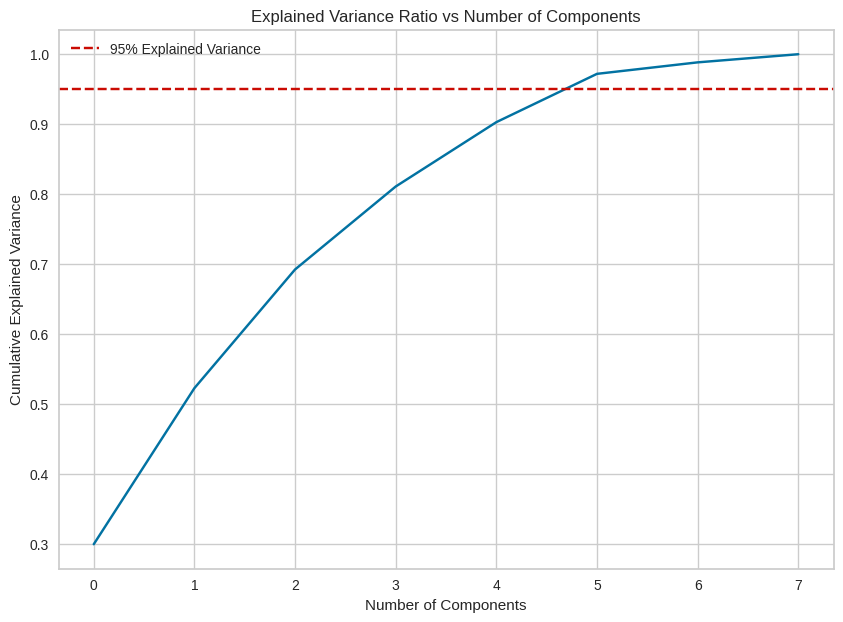

In [ ]:

from sklearn.decomposition import PCA

# Fit PCA
pca = PCA().fit(numeric_standardized)

# Plot the explained variance ratio
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio vs Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()


In [ ]:
n_components = 5
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(numeric_standardized)


pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

In [ ]:

categorical_data = df.select_dtypes(exclude=['float64', 'int64'])
final_data = pd.concat([pca_df, categorical_data.reset_index(drop=True)], axis=1)

final_data.head()

,PC1,PC2,PC3,PC4,PC5,Sex,Party,Candidate_Type,Constituency_Type,Sub_Region,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main
0,-0.855856,1.781714,0.579367,-1.450866,-0.853667,M,TDP,GEN,GEN,COASTAL ANDHRA,False,False,False,12th Pass,Agriculture
1,1.278762,-0.781772,2.024324,0.271801,0.933237,M,TDP,GEN,GEN,COASTAL ANDHRA,False,False,False,Graduate,Social Work
2,2.692322,-0.851185,0.319038,-2.091883,-0.719704,M,TDP,GEN,GEN,COASTAL ANDHRA,False,False,True,Others,Business
3,0.233515,0.699673,-0.313977,-0.721194,0.923424,M,YSRCP,GEN,GEN,COASTAL ANDHRA,True,False,True,Graduate,Agriculture
4,-0.358355,0.905962,0.696416,0.380183,0.400737,F,TDP,GEN,GEN,COASTAL ANDHRA,False,False,False,10th Pass,Politics


# Data Frame Feature Conversion

In [ ]:
df=final_data
df['Incumbent']=df['Incumbent'].astype('int')
df['Recontest']=df['Recontest'].astype('int')
df['Turncoat']=df['Turncoat'].astype('int')
df = df.replace({'Sex': {'M': 1, 'F': 0}})
df['Party'] = df['Party'].replace({'BJP': 'Third Parties', 'IND': 'Third Parties', 'NPT': 'Third Parties'})
party_dummies = pd.get_dummies(df['Party'], prefix='Party')
df = pd.concat([df, party_dummies], axis=1)
del df['Party'],df['Party_TDP']

df = df.replace({'Constituency_Type': {'GEN': 0, 'SC': 1,'ST':2}})
df = df.replace({'Candidate_Type': {'GEN': 0, 'SC': 1,'ST':2}})
df = df.replace({'Sub_Region': {'COASTAL ANDHRA': 0, 'RAYALA SEEMA': 1}})
del df['Constituency_Type']
education_dummies = pd.get_dummies(df['MyNeta_education'], prefix='Education')
df = pd.concat([df, education_dummies], axis=1)

profession_dummies = pd.get_dummies(df['TCPD_Prof_Main'], prefix='Profession')
df = pd.concat([df, profession_dummies], axis=1)

del df['MyNeta_education'],df['TCPD_Prof_Main']

In [ ]:
df

,PC1,PC2,PC3,PC4,PC5,Sex,Candidate_Type,Sub_Region,Turncoat,Incumbent,Recontest,Party_Third Parties,Party_YSRCP,Education_10th Pass,Education_12th Pass,Education_5th Pass,Education_8th Pass,Education_Doctorate,Education_Graduate,Education_Graduate Professional,Education_Literate,Education_Others,Education_Post Graduate,Profession_Agriculture,Profession_Business,Profession_Education,Profession_Former Government,Profession_Liberal Profession or Professional,Profession_Other or Unspecified,Profession_Politics,Profession_Retired or Pension,Profession_Salaried Work or Employed,Profession_Small Business or Self-employed,Profession_Social Work,Profession_Student
0,-0.855856,1.781714,0.579367,-1.450866,-0.853667,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.278762,-0.781772,2.024324,0.271801,0.933237,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.692322,-0.851185,0.319038,-2.091883,-0.719704,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.233515,0.699673,-0.313977,-0.721194,0.923424,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,-0.358355,0.905962,0.696416,0.380183,0.400737,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0.773566,1.322398,0.520204,1.620059,1.021636,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
171,0.021644,0.310568,-0.108445,1.664782,0.760240,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
172,0.106273,0.941329,-1.716476,-1.128232,0.566855,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
173,4.717750,-3.692367,-0.144155,-2.136131,-0.891820,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif_data


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,PC1,1.825712
1,PC2,1.500132
2,PC3,1.262405
3,PC4,1.359974
4,PC5,1.370376
5,Sex,1.499448
6,Candidate_Type,1.448390
7,Sub_Region,1.479400
8,Turncoat,2.091627
9,Incumbent,1.772087


In [ ]:
categorical_column_indices = ['Sex', 'Candidate_Type',
       'Sub_Region', 'Turncoat', 'Incumbent', 'Recontest',
       'Party_Third Parties', 'Party_YSRCP', 'Education_10th Pass',
       'Education_12th Pass', 'Education_5th Pass', 'Education_8th Pass',
       'Education_Doctorate', 'Education_Graduate',
       'Education_Graduate Professional', 'Education_Literate',
       'Education_Others', 'Education_Post Graduate', 'Profession_Agriculture',
       'Profession_Business', 'Profession_Education',
       'Profession_Former Government',
       'Profession_Liberal Profession or Professional',
       'Profession_Other or Unspecified', 'Profession_Politics',
       'Profession_Retired or Pension', 'Profession_Salaried Work or Employed',
       'Profession_Small Business or Self-employed', 'Profession_Social Work',
       'Profession_Student']

# Correlation Matrix

In [ ]:
co1 = df.corr()
px.imshow(co1[(co1>0.3)|(co1<=-0.3)])

# Elbow Method

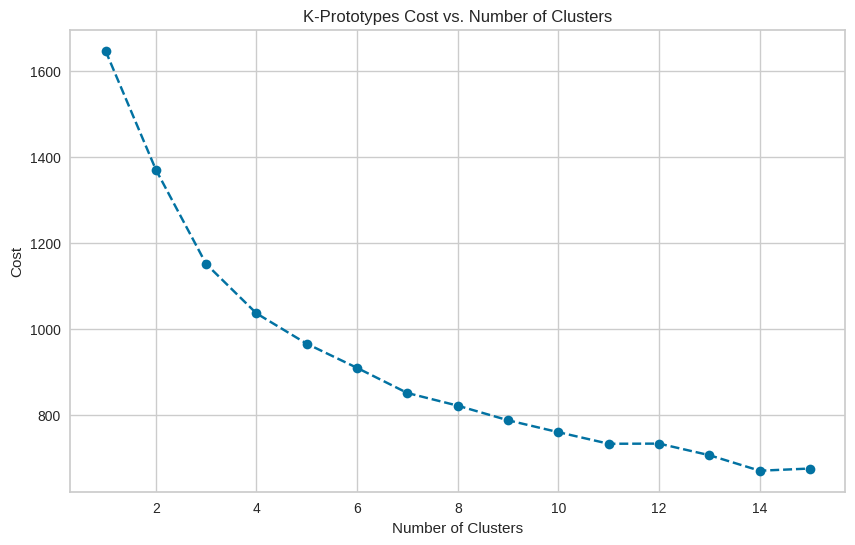

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kmodes.kprototypes import KPrototypes
costs = []
max_clusters = 15
for num_clusters in range(1, max_clusters + 1):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42, n_jobs=-1)
    kproto.fit_predict(df, categorical=list(range(5, df.shape[1])))
    costs.append(kproto.cost_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), costs, marker='o', linestyle='--')
plt.title('K-Prototypes Cost vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Kprototypes

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kmodes.kprototypes import KPrototypes

sil_scores = []
ch_scores = []

cluster_range = range(2, 15)


for num_clusters in cluster_range:
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42, n_jobs=-1)
    clusters = kproto.fit_predict(df, categorical=list(range(5, df.shape[1])))


    sil_score = silhouette_score(df, clusters, metric='euclidean') # Using Euclidean for simplicity
    sil_scores.append(sil_score)


    ch_score = calinski_harabasz_score(df, clusters)
    ch_scores.append(ch_score)




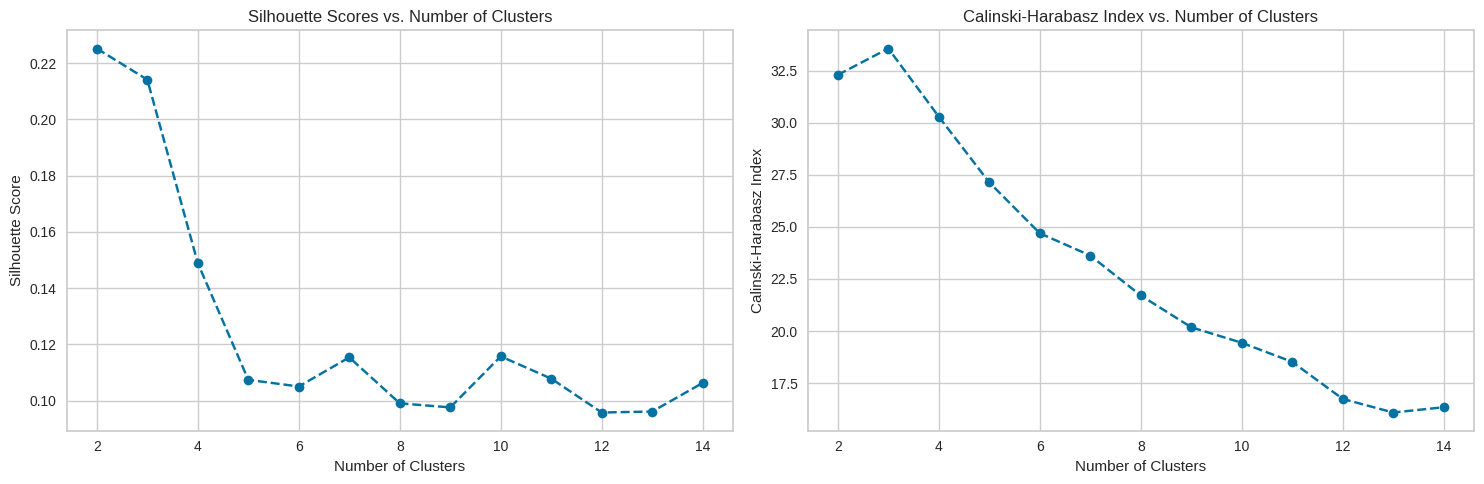

In [ ]:
plt.figure(figsize=(15, 5))

# Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, ch_scores, marker='o', linestyle='--')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

# Random State Determination

In [ ]:
random_state_range = range(0,102)
cluster_range = range(2,12)

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_column_indices = [df.columns.get_loc(col) for col in categorical_columns]

results = []

for state in random_state_range:
    for n_clusters in cluster_range:
        kproto = KPrototypes(n_clusters=n_clusters, init='Huang', random_state=state, n_jobs=-1)
        cluster_labels = kproto.fit_predict(df, categorical=list(range(5, df.shape[1])))

        silhouette_avg = silhouette_score(df, cluster_labels)
        calinski_score = calinski_harabasz_score(df, cluster_labels)
        distortion = kproto.cost_

        results.append({
            'random_state': state,
            'n_clusters': n_clusters,
            'silhouette_score': silhouette_avg,
            'calinski_score': calinski_score,
            'distortion': distortion
        })

df_results = pd.DataFrame(results)

df_results


,random_state,n_clusters,silhouette_score,calinski_score,distortion
0,0,2,0.225231,32.298527,1370.150612
1,0,3,0.214163,33.563086,1150.647975
2,0,4,0.143787,30.196435,1036.083376
3,0,5,0.101602,26.827387,968.528723
4,0,6,0.105762,24.308825,915.268046
...,...,...,...,...,...
1015,101,7,0.115546,23.677490,849.883066
1016,101,8,0.098891,21.690614,820.301968
1017,101,9,0.103651,19.700388,799.873439
1018,101,10,0.098119,18.849885,772.139004


In [ ]:
df_results.sort_values(by=['silhouette_score','calinski_score','distortion'],ascending=[False,False,True])

,random_state,n_clusters,silhouette_score,calinski_score,distortion
220,22,2,0.227824,32.141928,1370.472825
560,56,2,0.227824,32.141928,1370.472825
0,0,2,0.225231,32.298527,1370.150612
10,1,2,0.225231,32.298527,1370.150612
20,2,2,0.225231,32.298527,1370.150612
...,...,...,...,...,...
99,9,11,0.085553,17.508021,754.923593
539,53,11,0.084929,17.701905,748.415445
596,59,8,0.083060,20.765942,837.994152
39,3,11,0.081605,17.616913,747.131955


# Selecting the Clusters

In [ ]:
px.box(df_results,x='n_clusters',y='silhouette_score')

In [ ]:
px.box(df_results,x='n_clusters',y='calinski_score')

In [ ]:
import plotly.graph_objects as go
fig = px.box(df_results,x='n_clusters',y='distortion')

medians = df_results.groupby('n_clusters')['distortion'].median().sort_index()

fig.add_trace(go.Scatter(x=medians.index, y=medians.values, mode='lines+markers', name='medians'))

fig.show()

In [ ]:
df_results=df_results[df_results['n_clusters']==3]

In [ ]:
df_results.sort_values(by=['silhouette_score','calinski_score','distortion'],ascending=[False,False,True])

,random_state,n_clusters,silhouette_score,calinski_score,distortion
11,1,3,0.214163,33.563086,1150.647975
81,8,3,0.214163,33.563086,1150.647975
111,11,3,0.214163,33.563086,1150.647975
401,40,3,0.214163,33.563086,1150.647975
571,57,3,0.214163,33.563086,1150.647975
...,...,...,...,...,...
731,73,3,0.211088,33.682388,1151.109290
41,4,3,0.210720,33.713703,1150.891745
771,77,3,0.208914,33.698889,1151.291444
241,24,3,0.206838,33.615387,1151.708450


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
kmeanModel = KMeans(n_clusters=3,random_state=1).fit(df)
kmeanModel.fit(df)
predicted=kmeanModel.predict(df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
andhra=andhra[(andhra['Position']==1)]
andhra=andhra[(andhra['Poll_No']==0)]

In [ ]:
andhra

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
22313,AE,Andhra_Pradesh,14,1,2014,5,0,4,1,ASHOK BENDALAM,M,TDP,86815,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,71.52,53.95,no,25278,15.71,2.27,AEAP1810,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,32.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,NaN,NaN
22323,AE,Andhra_Pradesh,14,2,2014,5,0,4,1,GOUTHU SYAM SUNDER SIVAJI,M,TDP,69658,GEN,137294,190925,PALASA,GEN,COASTAL ANDHRA,11,71.91,50.74,no,17525,12.76,2.50,AEAP1820,NaN,8300,True,3.0,TDP,8300.0,SOMPETA,False,True,3.0,False,False,False,64.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Social Work,NaN,NaN,NaN
22335,AE,Andhra_Pradesh,14,3,2014,5,0,4,1,ATCHANNAIDU KINJARAPU,M,TDP,81167,GEN,160394,205744,TEKKALI,GEN,COASTAL ANDHRA,6,77.96,50.60,no,8387,5.23,2.13,AEAP12964,NaN,8300,True,5.0,TDP,8300.0,TEKKALI,True,True,4.0,False,False,True,43.0,SRIKAKULAM,NaN,NaN,NaN,Others,Business,NaN,NaN,NaN
22342,AE,Andhra_Pradesh,14,4,2014,5,0,4,1,KALAMATA VENKATA RAMANA MURTHY,M,YSRCP,69320,GEN,141038,193789,PATHAPATNAM,GEN,COASTAL ANDHRA,6,72.78,49.15,no,3865,2.74,2.17,AEAP6268,NaN,8615,True,2.0,TDP,8300.0,PATHAPATNAM,True,False,1.0,True,False,True,49.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN
22349,AE,Andhra_Pradesh,14,5,2014,5,0,4,1,GUNDA LAKSHMI DEVI,F,TDP,88814,GEN,164523,228112,SRIKAKULAM,GEN,COASTAL ANDHRA,12,72.12,53.98,no,24131,14.67,2.27,AEAP1846,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,53.0,SRIKAKULAM,NaN,NaN,NaN,10th Pass,Politics,Panchayat Head,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,AE,Andhra_Pradesh,14,171,2014,5,0,4,1,NARAYANASWAMY,M,YSRCP,84538,SC,155623,184535,GANGADHARA NELLORE,SC,RAYALA SEEMA,13,84.33,54.32,no,20565,13.21,2.13,AEAP4190,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,65.0,CHITTOOR,NaN,NaN,NaN,8th Pass,Agriculture,NaN,NaN,NaN
24707,AE,Andhra_Pradesh,14,172,2014,5,0,4,1,D. A. SATHYA PRABHA,F,TDP,73430,GEN,145409,192535,CHITTOOR,GEN,RAYALA SEEMA,15,75.52,50.50,no,6799,4.68,2.13,AEAP4204,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,62.0,CHITTOOR,NaN,NaN,NaN,5th Pass,Other or Unspecified,Household,NaN,NaN
24723,AE,Andhra_Pradesh,14,173,2014,5,0,4,1,M. SUNIL KUMAR,M,YSRCP,83200,SC,170651,200372,PUTHALAPATTU,SC,RAYALA SEEMA,6,85.17,48.75,no,902,0.53,2.13,AEAP4220,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,44.0,CHITTOOR,NaN,NaN,NaN,Graduate Professional,Retired or Pension,Retired Teacher,NaN,NaN
24730,AE,Andhra_Pradesh,14,174,2014,5,0,4,1,N.AMARANATH REDDY,M,YSRCP,96541,GEN,197579,234070,PALAMANER,GEN,RAYALA SEEMA,8,84.41,48.86,no,2890,1.46,2.17,AEAP8650,NaN,8615,True,8.0,TDP,8300.0,PALAMANER,True,False,6.0,True,True,True,54.0,CHITTOOR,NaN,NaN,NaN,Graduate,Business,Industrialist,Salaried Work or Employed,Managerial Position


<Axes: xlabel='predicted', ylabel='count'>

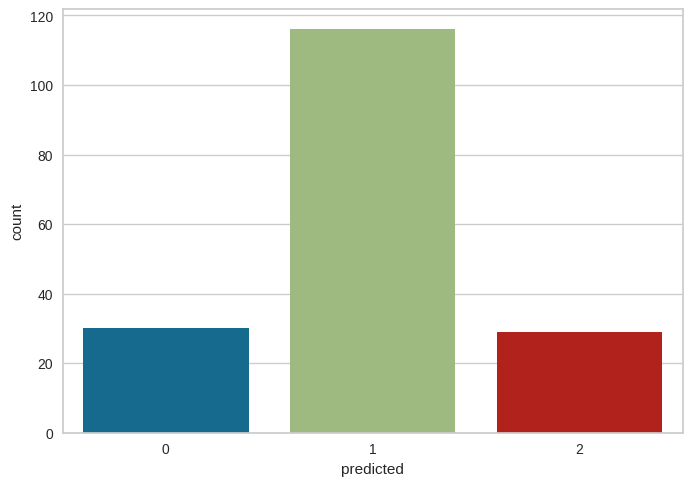

In [ ]:
andhra['predicted']=predicted
sns.countplot(x=andhra['predicted'])

# Performing the analysis on the clusters to get further insights.

# Imapact of Margin on Clusters

In [ ]:
fig = px.box(andhra, y='Margin', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# Impact of Number of Candidates on Clusters

In [ ]:
fig = px.box(andhra, y='N_Cand', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# Impact of Votes won by the winning candidate on Cluster

In [ ]:
fig = px.box(andhra, y='Votes', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# Impact of Total Voters on Cluster

In [ ]:
fig = px.box(andhra, y='Valid_Votes', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# Impact of Total Electors on Clusters

In [ ]:
fig = px.box(andhra, y='Electors', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# impact of Margin Percentage on the Clusters

In [ ]:
fig = px.box(andhra, y='Margin_Percentage', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# impact of Turnout Percentage on Clusters

In [ ]:
fig = px.box(andhra, y='Turnout_Percentage', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# Impact of ENOP on Clusters

In [ ]:
fig = px.box(andhra, y='ENOP', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# Impact of Candidates

In [ ]:
fig = px.box(andhra, y='N_Cand', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

<Axes: xlabel='Incumbent', ylabel='count'>

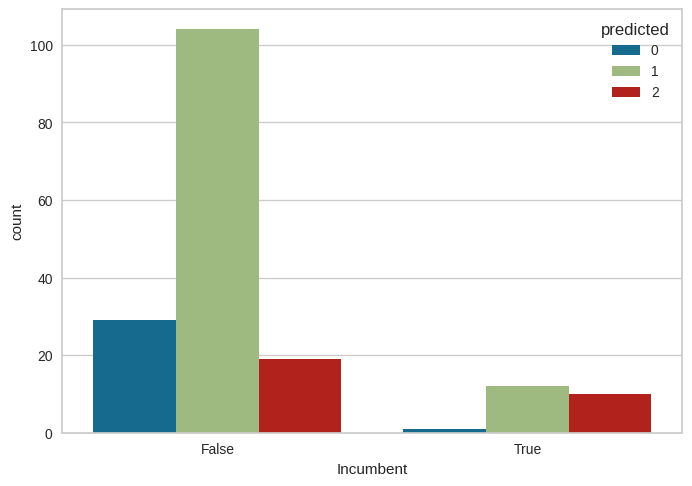

In [ ]:
sns.countplot(x=andhra['Incumbent'], hue=andhra['predicted'])

# Impact of Constituency Type

<Axes: xlabel='Constituency_Type', ylabel='count'>

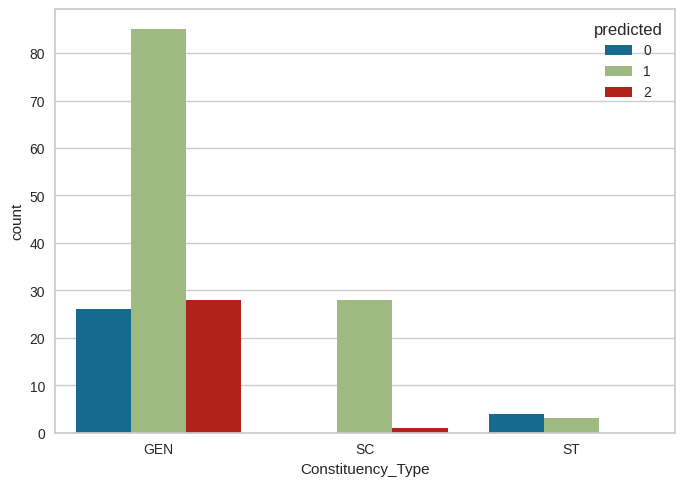

In [ ]:
sns.countplot(x=andhra['Constituency_Type'], hue=andhra['predicted'])

In [ ]:
andhra[andhra['predicted']==0]

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
22407,AE,Andhra_Pradesh,14,11,2014,5,0,4,1,PAMULA PUSHPA SREEVANI,F,YSRCP,55435,ST,133254,176271,KURUPAM,ST,COASTAL ANDHRA,8,75.60,41.60,no,19083,14.32,3.57,AEAP1904,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,27.0,VIZIANAGARAM,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,0
22439,AE,Andhra_Pradesh,14,15,2014,5,0,4,1,KIMIDI MRUNALINI,F,TDP,63787,GEN,154055,189401,CHEEPURUPALLE,GEN,COASTAL ANDHRA,11,81.34,41.41,no,20842,13.53,3.12,AEAP1936,NaN,8300,False,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,55.0,VIZIANAGARAM,NaN,NaN,NaN,12th Pass,Politics,MLA,Agriculture,NaN,0
22452,AE,Andhra_Pradesh,14,16,2014,5,0,4,1,APPALANAIDU KONDAPALLI,M,TDP,65117,GEN,159713,187066,GAJAPATHINAGARAM,GEN,COASTAL ANDHRA,8,85.38,40.77,no,19423,12.16,3.03,AEAP1949,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,47.0,VIZIANAGARAM,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN,0
22461,AE,Andhra_Pradesh,14,17,2014,5,0,4,1,NARAYANA SWAMY NAIDU PATHIVADA,M,TDP,71267,GEN,166194,189233,NELLIMARLA,GEN,COASTAL ANDHRA,10,87.83,42.88,no,6973,4.20,2.86,AEAP1958,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,75.0,VIZIANAGARAM,NaN,NaN,NaN,Graduate Professional,Small Business or Self-employed,Self-employed,NaN,NaN,0
22541,AE,Andhra_Pradesh,14,23,2014,5,0,4,1,PENMETSA VISHNU KUMAR RAJU,M,BJP,82079,GEN,159862,267215,VISAKHAPATNAM NORTH,GEN,COASTAL ANDHRA,13,59.83,51.34,no,18240,11.41,2.38,AEAP2038,NaN,1605,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,52.0,VISHAKAPATNAM,NaN,NaN,NaN,Post Graduate,Business,NaN,NaN,NaN,0
22568,AE,Andhra_Pradesh,14,25,2014,5,0,4,1,PALLA SRINIVAS RAO,M,TDP,97109,GEN,188401,290224,GAJUWAKA,GEN,COASTAL ANDHRA,17,64.92,51.54,no,21712,11.52,2.33,AEAP2065,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,44.0,VISHAKAPATNAM,NaN,NaN,NaN,Post Graduate,Business,NaN,Agriculture,NaN,0
22603,AE,Andhra_Pradesh,14,28,2014,5,0,4,1,KIDARI SARVESWARA RAO,M,YSRCP,63700,ST,150109,214100,ARAKU VALLEY,ST,COASTAL ANDHRA,11,70.11,42.44,no,34053,22.69,4.00,AEAP2100,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,41.0,VISHAKAPATNAM,NaN,NaN,NaN,Doctorate,Agriculture,NaN,NaN,NaN,0
22615,AE,Andhra_Pradesh,14,29,2014,5,0,4,1,ESWARI GIDDI,F,YSRCP,52384,ST,127849,213796,PADERU,ST,COASTAL ANDHRA,10,59.80,40.97,no,26141,20.45,3.85,AEAP2112,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,44.0,VISHAKAPATNAM,NaN,NaN,NaN,Post Graduate,Politics,MLA,NaN,NaN,0
22725,AE,Andhra_Pradesh,14,38,2014,5,0,4,1,ANANTHA LAKSHMI PILLI,F,TDP,61144,GEN,165338,221700,KAKINADA RURAL,GEN,COASTAL ANDHRA,17,74.58,36.98,no,9048,5.47,3.23,AEAP2222,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,55.0,EAST GODAVARI,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Doctor,NaN,NaN,0
22908,AE,Andhra_Pradesh,14,50,2014,5,0,4,1,AKULA SATYANARAYANA,M,BJP,79531,GEN,158317,229742,RAJAHMUNDRY CITY,GEN,COASTAL ANDHRA,20,68.91,50.24,no,26377,16.66,2.70,AEAP2405,NaN,1605,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,50.0,EAST GODAVARI,NaN,NaN,NaN,Graduate,Business,Agricultural Business,NaN,NaN,0


In [ ]:
andhra[(andhra['predicted']==1)]

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
22313,AE,Andhra_Pradesh,14,1,2014,5,0,4,1,ASHOK BENDALAM,M,TDP,86815,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,71.52,53.95,no,25278,15.71,2.27,AEAP1810,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,32.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,NaN,NaN,1
22342,AE,Andhra_Pradesh,14,4,2014,5,0,4,1,KALAMATA VENKATA RAMANA MURTHY,M,YSRCP,69320,GEN,141038,193789,PATHAPATNAM,GEN,COASTAL ANDHRA,6,72.78,49.15,no,3865,2.74,2.17,AEAP6268,NaN,8615,True,2.0,TDP,8300.0,PATHAPATNAM,True,False,1.0,True,False,True,49.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN,1
22349,AE,Andhra_Pradesh,14,5,2014,5,0,4,1,GUNDA LAKSHMI DEVI,F,TDP,88814,GEN,164523,228112,SRIKAKULAM,GEN,COASTAL ANDHRA,12,72.12,53.98,no,24131,14.67,2.27,AEAP1846,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,53.0,SRIKAKULAM,NaN,NaN,NaN,10th Pass,Politics,Panchayat Head,NaN,NaN,1
22362,AE,Andhra_Pradesh,14,6,2014,5,0,4,1,KOONA RAVIKUMAR,M,TDP,65233,GEN,134111,173788,AMADALAVALASA,GEN,COASTAL ANDHRA,9,77.17,48.64,no,5449,4.06,2.27,AEAP6286,NaN,8300,True,2.0,TDP,8300.0,AMADALAVALASA,True,True,1.0,False,False,True,46.0,SRIKAKULAM,NaN,NaN,NaN,Post Graduate,Social Work,NaN,NaN,NaN,1
22381,AE,Andhra_Pradesh,14,8,2014,5,0,4,1,RAMANAMURTY BAGGU,M,TDP,76559,GEN,155156,196379,NARASANNAPETA,GEN,COASTAL ANDHRA,7,79.01,49.34,no,4800,3.09,2.22,AEAP1878,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,55.0,SRIKAKULAM,NaN,NaN,NaN,Post Graduate,Agriculture,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24667,AE,Andhra_Pradesh,14,169,2014,5,0,4,1,TALARI ADITYA,M,TDP,77655,SC,161036,193718,SATYAVEDU,SC,RAYALA SEEMA,12,83.13,48.22,no,4227,2.62,2.27,AEAP4164,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,29.0,CHITTOOR,NaN,NaN,NaN,Post Graduate,Business,NaN,NaN,NaN,1
24680,AE,Andhra_Pradesh,14,170,2014,5,0,4,1,R.. K ROJA,F,YSRCP,74724,GEN,158201,185593,NAGARI,GEN,RAYALA SEEMA,12,85.24,47.23,no,858,0.54,2.27,AEAP4177,NaN,8615,True,2.0,TDP,8300.0,NAGARI,True,False,1.0,True,False,False,42.0,CHITTOOR,NaN,NaN,NaN,Graduate,Business,NaN,NaN,NaN,1
24693,AE,Andhra_Pradesh,14,171,2014,5,0,4,1,NARAYANASWAMY,M,YSRCP,84538,SC,155623,184535,GANGADHARA NELLORE,SC,RAYALA SEEMA,13,84.33,54.32,no,20565,13.21,2.13,AEAP4190,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,65.0,CHITTOOR,NaN,NaN,NaN,8th Pass,Agriculture,NaN,NaN,NaN,1
24707,AE,Andhra_Pradesh,14,172,2014,5,0,4,1,D. A. SATHYA PRABHA,F,TDP,73430,GEN,145409,192535,CHITTOOR,GEN,RAYALA SEEMA,15,75.52,50.50,no,6799,4.68,2.13,AEAP4204,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,62.0,CHITTOOR,NaN,NaN,NaN,5th Pass,Other or Unspecified,Household,NaN,NaN,1


In [ ]:
andhra[(andhra['predicted']==2)]

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
22323,AE,Andhra_Pradesh,14,2,2014,5,0,4,1,GOUTHU SYAM SUNDER SIVAJI,M,TDP,69658,GEN,137294,190925,PALASA,GEN,COASTAL ANDHRA,11,71.91,50.74,no,17525,12.76,2.50,AEAP1820,NaN,8300,True,3.0,TDP,8300.0,SOMPETA,False,True,3.0,False,False,False,64.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Social Work,NaN,NaN,NaN,2
22335,AE,Andhra_Pradesh,14,3,2014,5,0,4,1,ATCHANNAIDU KINJARAPU,M,TDP,81167,GEN,160394,205744,TEKKALI,GEN,COASTAL ANDHRA,6,77.96,50.60,no,8387,5.23,2.13,AEAP12964,NaN,8300,True,5.0,TDP,8300.0,TEKKALI,True,True,4.0,False,False,True,43.0,SRIKAKULAM,NaN,NaN,NaN,Others,Business,NaN,NaN,NaN,2
22372,AE,Andhra_Pradesh,14,7,2014,5,0,4,1,KALAVENKATARAO KIMIDI,M,TDP,85769,GEN,174001,210400,ETCHERLA,GEN,COASTAL ANDHRA,8,82.70,49.29,no,4741,2.72,2.17,AEAP1869,NaN,8300,True,6.0,PRAP,6132.0,ETCHERLA,True,False,5.0,True,False,True,60.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,NaN,NaN,2
22432,AE,Andhra_Pradesh,14,14,2014,5,0,4,1,VENKATA SUJAY KRISHNA RANGA RAO RAVU,M,YSRCP,83587,GEN,168281,211986,BOBBILI,GEN,COASTAL ANDHRA,6,79.38,49.67,no,6958,4.13,2.17,AEAP1929,NaN,8615,True,3.0,INC,3482.0,BOBBILI,True,False,3.0,True,True,True,43.0,VIZIANAGARAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,NaN,NaN,2
22641,AE,Andhra_Pradesh,14,31,2014,5,0,4,1,BANDARU SATYANARAYANA MURTHY,M,TDP,94531,GEN,182248,233105,PENDURTHI,GEN,COASTAL ANDHRA,10,78.18,51.87,no,18648,10.23,2.27,AEAP10925,NaN,8300,True,5.0,TDP,8300.0,PENDURTHI,True,True,3.0,False,False,True,54.0,VISHAKAPATNAM,NaN,NaN,NaN,Graduate,Business,NaN,NaN,NaN,2
22675,AE,Andhra_Pradesh,14,34,2014,5,0,4,1,AYYANNAPATRUDU CHINTHAKAYALA,M,TDP,79726,GEN,163181,198645,NARSIPATNAM,GEN,COASTAL ANDHRA,11,82.15,48.86,no,2338,1.43,2.17,GEAP59724,NaN,8300,True,7.0,TDP,8300.0,NARSIPATNAM,True,True,6.0,False,False,True,57.0,VISHAKAPATNAM,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Lawyer,NaN,NaN,2
22697,AE,Andhra_Pradesh,14,36,2014,5,0,4,1,VARUPULA SUBBARAO,M,YSRCP,63693,GEN,148075,184820,PRATHIPADU,GEN,COASTAL ANDHRA,11,80.12,43.01,no,3413,2.30,2.78,AEAP20341,NaN,8615,True,6.0,INC,3482.0,PRATHIPADU,True,False,2.0,True,False,True,70.0,EAST GODAVARI,NaN,NaN,NaN,Graduate,Liberal Profession or Professional,Actor,Politics,Party Worker,2
22774,AE,Andhra_Pradesh,14,41,2014,5,0,4,1,VANAMADI VENKATESWARARAO (KONDABABU),M,TDP,76467,GEN,140523,207111,KAKINADA CITY,GEN,COASTAL ANDHRA,16,67.85,54.42,no,24000,17.08,2.27,AEAP2271,NaN,8300,True,4.0,TDP,8300.0,KAKINADA CITY,True,True,2.0,False,False,True,49.0,EAST GODAVARI,NaN,NaN,NaN,12th Pass,Agriculture,NaN,NaN,NaN,2
22791,AE,Andhra_Pradesh,14,42,2014,5,0,4,1,THOTA TRIMURTHULU,M,TDP,85254,GEN,160133,181646,RAMACHANDRAPURAM,GEN,COASTAL ANDHRA,17,88.16,53.24,no,16922,10.57,2.17,AEAP13325,NaN,8300,True,5.0,PRAP,6132.0,RAMACHANDRAPURAM,True,False,3.0,True,False,True,55.0,EAST GODAVARI,NaN,NaN,NaN,Graduate,Business,NaN,Agriculture,NaN,2
22846,AE,Andhra_Pradesh,14,46,2014,5,0,4,1,PULAPARTY NARAYANA MURTY,M,TDP,74967,SC,142815,183100,GANNAVARAM,SC,COASTAL ANDHRA,12,78.00,52.49,no,13505,9.46,2.13,AEAP2343,NaN,8300,True,3.0,TDP,8300.0,GANNAVARAM,True,True,2.0,False,False,True,65.0,EAST GODAVARI,NaN,NaN,NaN,8th Pass,Business,NaN,Agriculture,NaN,2


# Creating a Gegrpahical Representation of the Map of Clustering

In [ ]:
andhra_2014 = andhra[[ 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'last_poll', 'Contested', 'Last_Party',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name', 'MyNeta_education', 'TCPD_Prof_Main','predicted']]

In [ ]:
andhra

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
22313,AE,Andhra_Pradesh,14,1,2014,5,0,4,1,ASHOK BENDALAM,M,TDP,86815,GEN,160919,224989,ICHCHAPURAM,GEN,COASTAL ANDHRA,9,71.52,53.95,no,25278,15.71,2.27,AEAP1810,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,32.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,NaN,NaN,1
22323,AE,Andhra_Pradesh,14,2,2014,5,0,4,1,GOUTHU SYAM SUNDER SIVAJI,M,TDP,69658,GEN,137294,190925,PALASA,GEN,COASTAL ANDHRA,11,71.91,50.74,no,17525,12.76,2.50,AEAP1820,NaN,8300,True,3.0,TDP,8300.0,SOMPETA,False,True,3.0,False,False,False,64.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Social Work,NaN,NaN,NaN,2
22335,AE,Andhra_Pradesh,14,3,2014,5,0,4,1,ATCHANNAIDU KINJARAPU,M,TDP,81167,GEN,160394,205744,TEKKALI,GEN,COASTAL ANDHRA,6,77.96,50.60,no,8387,5.23,2.13,AEAP12964,NaN,8300,True,5.0,TDP,8300.0,TEKKALI,True,True,4.0,False,False,True,43.0,SRIKAKULAM,NaN,NaN,NaN,Others,Business,NaN,NaN,NaN,2
22342,AE,Andhra_Pradesh,14,4,2014,5,0,4,1,KALAMATA VENKATA RAMANA MURTHY,M,YSRCP,69320,GEN,141038,193789,PATHAPATNAM,GEN,COASTAL ANDHRA,6,72.78,49.15,no,3865,2.74,2.17,AEAP6268,NaN,8615,True,2.0,TDP,8300.0,PATHAPATNAM,True,False,1.0,True,False,True,49.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN,1
22349,AE,Andhra_Pradesh,14,5,2014,5,0,4,1,GUNDA LAKSHMI DEVI,F,TDP,88814,GEN,164523,228112,SRIKAKULAM,GEN,COASTAL ANDHRA,12,72.12,53.98,no,24131,14.67,2.27,AEAP1846,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,53.0,SRIKAKULAM,NaN,NaN,NaN,10th Pass,Politics,Panchayat Head,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24693,AE,Andhra_Pradesh,14,171,2014,5,0,4,1,NARAYANASWAMY,M,YSRCP,84538,SC,155623,184535,GANGADHARA NELLORE,SC,RAYALA SEEMA,13,84.33,54.32,no,20565,13.21,2.13,AEAP4190,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,65.0,CHITTOOR,NaN,NaN,NaN,8th Pass,Agriculture,NaN,NaN,NaN,1
24707,AE,Andhra_Pradesh,14,172,2014,5,0,4,1,D. A. SATHYA PRABHA,F,TDP,73430,GEN,145409,192535,CHITTOOR,GEN,RAYALA SEEMA,15,75.52,50.50,no,6799,4.68,2.13,AEAP4204,NaN,8300,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,62.0,CHITTOOR,NaN,NaN,NaN,5th Pass,Other or Unspecified,Household,NaN,NaN,1
24723,AE,Andhra_Pradesh,14,173,2014,5,0,4,1,M. SUNIL KUMAR,M,YSRCP,83200,SC,170651,200372,PUTHALAPATTU,SC,RAYALA SEEMA,6,85.17,48.75,no,902,0.53,2.13,AEAP4220,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,44.0,CHITTOOR,NaN,NaN,NaN,Graduate Professional,Retired or Pension,Retired Teacher,NaN,NaN,1
24730,AE,Andhra_Pradesh,14,174,2014,5,0,4,1,N.AMARANATH REDDY,M,YSRCP,96541,GEN,197579,234070,PALAMANER,GEN,RAYALA SEEMA,8,84.41,48.86,no,2890,1.46,2.17,AEAP8650,NaN,8615,True,8.0,TDP,8300.0,PALAMANER,True,False,6.0,True,True,True,54.0,CHITTOOR,NaN,NaN,NaN,Graduate,Business,Industrialist,Salaried Work or Employed,Managerial Position,2


In [ ]:
import geopandas as gpd
import pyproj

In [ ]:
# Importing the shape file of assembly-constituencies
fp = "/content/drive/My Drive/dataverse_files/maps-master/assembly-constituencies"
map_df = gpd.read_file(fp)
map_df = map_df[map_df['ST_NAME']=='ANDHRA PRADESH']

In [ ]:
map_df

,OBJECTID,ST_CODE,ST_NAME,DT_CODE,DIST_NAME,AC_NO,AC_NAME,PC_NO,PC_NAME,PC_ID,STATUS,Shape_Leng,Shape_Area,geometry
968,1,28,ANDHRA PRADESH,1.0,ADILABAD,8,Boath (ST),1,ADILABAD(ST),2801,NaN,2.542348,0.175322,"POLYGON ((78.30652 19.91426, 78.33071 19.91489..."
969,1,28,ANDHRA PRADESH,1.0,ADILABAD,7,Adilabad,1,ADILABAD(ST),2801,NaN,1.366577,0.077866,"POLYGON ((78.49092 19.79276, 78.50730 19.79774..."
970,1,28,ANDHRA PRADESH,1.0,ADILABAD,5,Asifabad (ST),1,ADILABAD(ST),2801,NaN,3.248354,0.238409,"POLYGON ((78.85763 19.65812, 78.88743 19.65542..."
971,1,28,ANDHRA PRADESH,1.0,ADILABAD,1,Sirpur,1,ADILABAD(ST),2801,NaN,2.133774,0.181435,"POLYGON ((79.80651 19.57896, 79.81635 19.57423..."
972,1,28,ANDHRA PRADESH,1.0,ADILABAD,6,Khanapur (ST),1,ADILABAD(ST),2801,NaN,2.347789,0.180807,"POLYGON ((78.77616 19.56131, 78.77511 19.53203..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,42,28,ANDHRA PRADESH,23.0,CHITTOOR,292,Puthalapattu (SC),42,CHITTOOR (SC),2842,NaN,1.697648,0.086254,"POLYGON ((79.13947 13.39357, 79.12988 13.36498..."
1260,42,28,ANDHRA PRADESH,23.0,CHITTOOR,290,Gangadhara Nellore (SC),42,CHITTOOR (SC),2842,NaN,2.153722,0.093254,"POLYGON ((79.42512 13.48470, 79.45876 13.47981..."
1261,42,28,ANDHRA PRADESH,23.0,CHITTOOR,293,Palamaner,42,CHITTOOR (SC),2842,NaN,1.981326,0.097469,"POLYGON ((78.72809 13.35465, 78.75406 13.35562..."
1262,42,28,ANDHRA PRADESH,23.0,CHITTOOR,291,Chittoor,42,CHITTOOR (SC),2842,NaN,1.020624,0.031905,"POLYGON ((79.10409 13.26336, 79.12292 13.25850..."


In [ ]:
map_df = map_df[['AC_NAME','DIST_NAME','geometry']]
map_df.reset_index(drop=True,inplace=True)
map_df.head(3)

,AC_NAME,DIST_NAME,geometry
0,Boath (ST),ADILABAD,"POLYGON ((78.30652 19.91426, 78.33071 19.91489..."
1,Adilabad,ADILABAD,"POLYGON ((78.49092 19.79276, 78.50730 19.79774..."
2,Asifabad (ST),ADILABAD,"POLYGON ((78.85763 19.65812, 78.88743 19.65542..."


<Axes: >

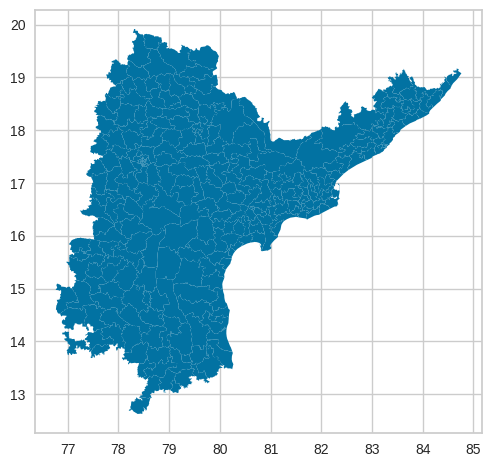

In [ ]:
map_df.plot()

In [ ]:
map_df.dropna(inplace=True) # The 'None' type rows are removed
map_df.reset_index(drop=True,inplace=True) # index is reset
map_df.head()

,AC_NAME,DIST_NAME,geometry
0,Boath (ST),ADILABAD,"POLYGON ((78.30652 19.91426, 78.33071 19.91489..."
1,Adilabad,ADILABAD,"POLYGON ((78.49092 19.79276, 78.50730 19.79774..."
2,Asifabad (ST),ADILABAD,"POLYGON ((78.85763 19.65812, 78.88743 19.65542..."
3,Sirpur,ADILABAD,"POLYGON ((79.80651 19.57896, 79.81635 19.57423..."
4,Khanapur (ST),ADILABAD,"POLYGON ((78.77616 19.56131, 78.77511 19.53203..."


In [ ]:
def text_process(names):
    semi_cleaned_names = [word for word in names.strip().lower().split() if word not in ['(st)','(sc)','(gen)']]
    joined_cleaned_names = " ".join(semi_cleaned_names)
    removed_st_names = joined_cleaned_names.replace("(st)","")
    fully_cleaned_names = removed_st_names.replace("(sc)","")
    return fully_cleaned_names
# The cleaned names
map_df['cleaned_names']=map_df['AC_NAME'].apply(text_process)
map_df = map_df[['cleaned_names','DIST_NAME','geometry']]

In [ ]:
andhra_2014['Constituency_Name'] = andhra_2014['Constituency_Name'].apply(lambda x:x.lower())
andhra_2014['District_Name'] = andhra_2014['District_Name'].apply(lambda x:x.lower())
map_df['DIST_NAME'] = map_df['DIST_NAME'].apply(lambda x:x.lower())


In [ ]:
map_df['DIST_NAME'] = map_df['DIST_NAME'].replace({'visakhapatnam': 'vishakapatnam', 'cuddapah': 'kadapa'})
merged = pd.merge(andhra_2014,map_df,left_on=['District_Name','Constituency_Name'],right_on=['DIST_NAME','cleaned_names'],how='inner')
merged

,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,last_poll,Contested,Last_Party,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,MyNeta_education,TCPD_Prof_Main,predicted,cleaned_names,DIST_NAME,geometry
0,ASHOK BENDALAM,M,TDP,86815,GEN,160919,224989,ichchapuram,GEN,COASTAL ANDHRA,9,71.52,53.95,no,25278,15.71,2.27,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,32.0,srikakulam,12th Pass,Agriculture,1,ichchapuram,srikakulam,"POLYGON ((84.73676 19.09571, 84.76474 19.07728..."
1,GOUTHU SYAM SUNDER SIVAJI,M,TDP,69658,GEN,137294,190925,palasa,GEN,COASTAL ANDHRA,11,71.91,50.74,no,17525,12.76,2.50,True,3.0,TDP,SOMPETA,False,True,3.0,False,False,False,64.0,srikakulam,Graduate,Social Work,2,palasa,srikakulam,"POLYGON ((84.46612 18.99420, 84.46588 18.96358..."
2,ATCHANNAIDU KINJARAPU,M,TDP,81167,GEN,160394,205744,tekkali,GEN,COASTAL ANDHRA,6,77.96,50.60,no,8387,5.23,2.13,True,5.0,TDP,TEKKALI,True,True,4.0,False,False,True,43.0,srikakulam,Others,Business,2,tekkali,srikakulam,"POLYGON ((84.39360 18.74564, 84.39519 18.73398..."
3,KALAMATA VENKATA RAMANA MURTHY,M,YSRCP,69320,GEN,141038,193789,pathapatnam,GEN,COASTAL ANDHRA,6,72.78,49.15,no,3865,2.74,2.17,True,2.0,TDP,PATHAPATNAM,True,False,1.0,True,False,True,49.0,srikakulam,Graduate,Agriculture,1,pathapatnam,srikakulam,"POLYGON ((84.35943 18.83158, 84.35636 18.80515..."
4,GUNDA LAKSHMI DEVI,F,TDP,88814,GEN,164523,228112,srikakulam,GEN,COASTAL ANDHRA,12,72.12,53.98,no,24131,14.67,2.27,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,53.0,srikakulam,10th Pass,Politics,1,srikakulam,srikakulam,"POLYGON ((83.96601 18.38461, 83.98333 18.37649..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,NARAYANASWAMY,M,YSRCP,84538,SC,155623,184535,gangadhara nellore,SC,RAYALA SEEMA,13,84.33,54.32,no,20565,13.21,2.13,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,65.0,chittoor,8th Pass,Agriculture,1,gangadhara nellore,chittoor,"POLYGON ((79.42512 13.48470, 79.45876 13.47981..."
171,D. A. SATHYA PRABHA,F,TDP,73430,GEN,145409,192535,chittoor,GEN,RAYALA SEEMA,15,75.52,50.50,no,6799,4.68,2.13,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,62.0,chittoor,5th Pass,Other or Unspecified,1,chittoor,chittoor,"POLYGON ((79.10409 13.26336, 79.12292 13.25850..."
172,M. SUNIL KUMAR,M,YSRCP,83200,SC,170651,200372,puthalapattu,SC,RAYALA SEEMA,6,85.17,48.75,no,902,0.53,2.13,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,44.0,chittoor,Graduate Professional,Retired or Pension,1,puthalapattu,chittoor,"POLYGON ((79.13947 13.39357, 79.12988 13.36498..."
173,N.AMARANATH REDDY,M,YSRCP,96541,GEN,197579,234070,palamaner,GEN,RAYALA SEEMA,8,84.41,48.86,no,2890,1.46,2.17,True,8.0,TDP,PALAMANER,True,False,6.0,True,True,True,54.0,chittoor,Graduate,Business,2,palamaner,chittoor,"POLYGON ((78.72809 13.35465, 78.75406 13.35562..."


In [ ]:
cdm={'0.0':'red','1.0':'Yellow','2.0':'Green'}
#cdm={'0':'Red','1':'Yellow','2':'Green','3':'Orange'}

In [ ]:
merged['District-Constituency'] = merged['District_Name'] + ' _ ' +merged['Constituency_Name']

In [ ]:
merged = merged.set_geometry("geometry").set_index("District-Constituency")

In [ ]:


fig = px.choropleth(merged, geojson=merged.geometry, locations=merged.index, color="predicted",color_discrete_map=cdm,hover_name="DIST_NAME")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [ ]:
merged['District_Name'].unique()

array(['srikakulam', 'vizianagaram', 'vishakapatnam', 'east godavari',
       'west godavari', 'krishna', 'guntur', 'prakasam', 'nellore',
       'kadapa', 'kurnool', 'anantapur', 'chittoor'], dtype=object)

# District Wise Clustering

In [ ]:

for district in merged['District_Name'].unique():
  fig = px.choropleth(merged[merged['District_Name']==district], geojson=merged[merged['District_Name']==district].geometry, locations=merged[merged['District_Name']==district].index, color="predicted",color_discrete_map=cdm)
  fig.update_geos(fitbounds="locations", visible=False)
  fig.show()

<Axes: xlabel='Party', ylabel='count'>

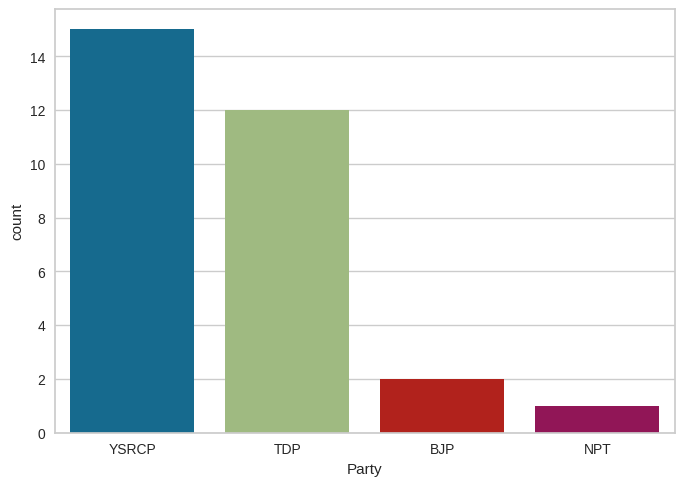

In [ ]:
sns.countplot(x=andhra_2014[andhra_2014['predicted']==0]['Party'])

<Axes: xlabel='Party', ylabel='count'>

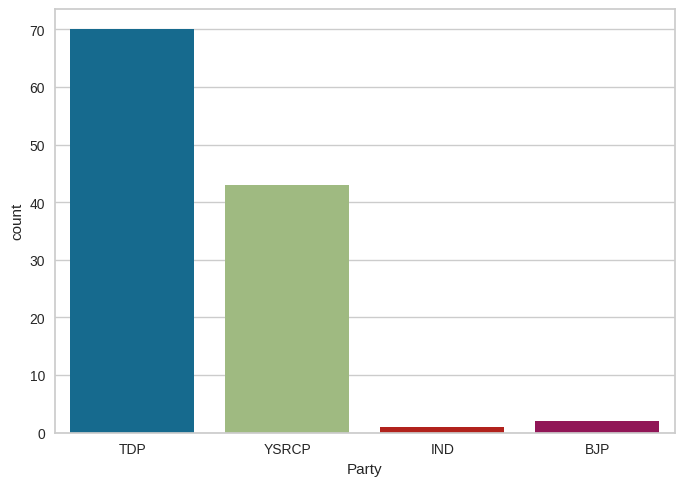

In [ ]:
sns.countplot(x=andhra_2014[andhra_2014['predicted']==1]['Party'])

<Axes: xlabel='Party', ylabel='count'>

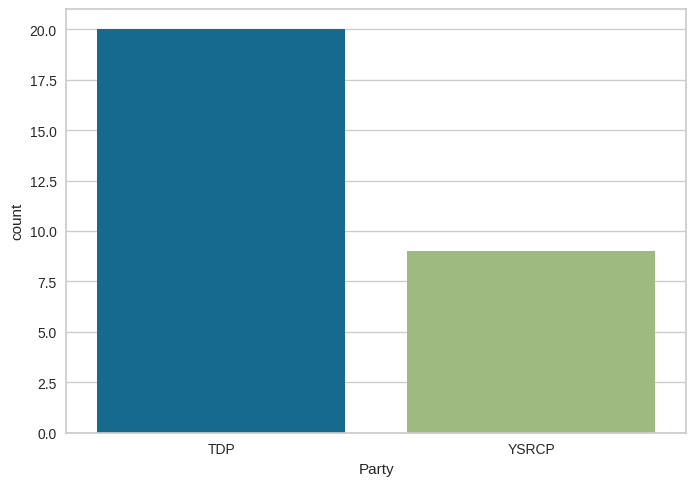

In [ ]:
sns.countplot(x=andhra_2014[andhra_2014['predicted']==2]['Party'])

In [ ]:
fig = px.box(andhra_2014, y='Age', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

# Impact of Number of times of Contest on Final Outcome

<Axes: xlabel='Contested', ylabel='count'>

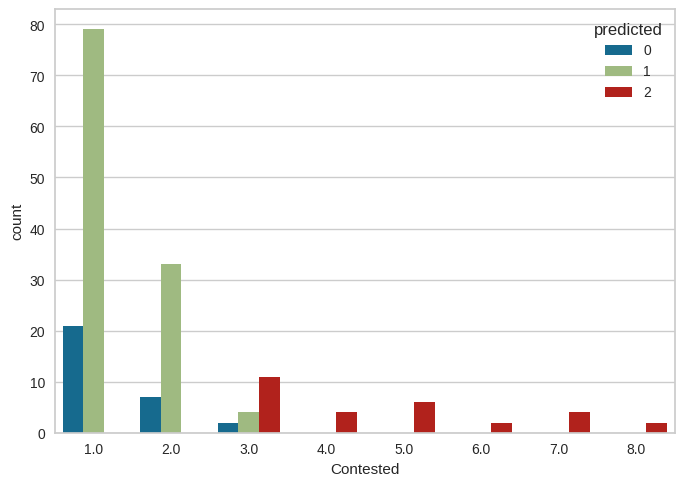

In [ ]:
sns.countplot(x=andhra_2014['Contested'], hue=andhra_2014['predicted'])

# Impact of Turncoats on clusters

<Axes: xlabel='Turncoat', ylabel='count'>

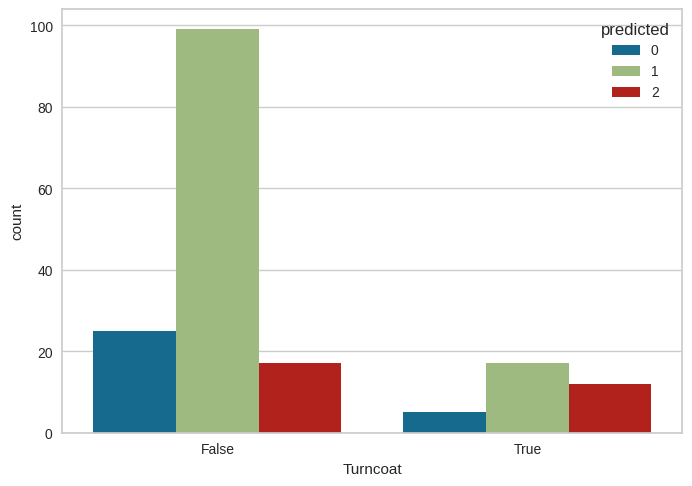

In [ ]:
sns.countplot(x=andhra_2014['Turncoat'], hue=andhra_2014['predicted'])

# Impact of Eductaion

<Axes: xlabel='MyNeta_education', ylabel='count'>

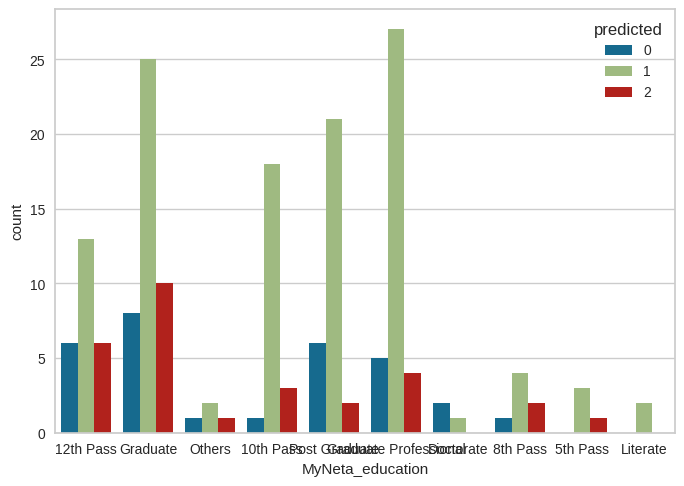

In [ ]:
sns.countplot(x=andhra_2014['MyNeta_education'], hue=andhra_2014['predicted'])

# Saving the Data

In [ ]:
andhra_2014.to_csv('/content/drive/My Drive/Constituency/Combined_Cluster_2014.csv')